In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
col_name = ['hours_studied', 'exam1', 'activity', 'sleep_hours', 'sample_hours', 'total_hours', 'exam2']
df = pd.read_csv('/content/drive/MyDrive/data_demo/student_performance.csv', names=col_name, header=0)
df

,hours_studied,exam1,activity,sleep_hours,sample_hours,total_hours,exam2
0,7,99,Yes,9,1,8,91
1,4,82,No,4,2,6,65
2,8,51,Yes,7,2,10,45
3,5,52,Yes,5,2,7,36
4,7,75,No,8,5,12,66
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,3,23
9996,7,64,Yes,8,5,12,58
9997,6,83,Yes,8,5,11,74
9998,9,97,Yes,7,0,9,95


In [ ]:
df.describe()

,hours_studied,exam1,sleep_hours,sample_hours,total_hours,exam2
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,9.576200,55.234800
std,2.589309,17.343152,1.695863,2.867348,3.896859,19.261827
min,1.000000,40.000000,4.000000,0.000000,1.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,7.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,10.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,12.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,18.000000,200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hours_studied  10000 non-null  int64 
 1   exam1          10000 non-null  int64 
 2   activity       10000 non-null  object
 3   sleep_hours    10000 non-null  int64 
 4   sample_hours   10000 non-null  int64 
 5   total_hours    10000 non-null  int64 
 6   exam2          10000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 547.0+ KB


DATA CLEANING

In [ ]:
df['activity'].unique()

array(['Yes', 'No', 'N', 'Y', 'Nah', 'Yess'], dtype=object)

In [ ]:
replacement = {'N':'No', 'Y':'Yes', 'Nah':'No', 'Yess':'Yes'}
df['activity'] = df['activity'].replace(replacement)

In [ ]:
df.loc[df['exam2']>100, 'exam2']

,exam2
145,200


In [ ]:
df['exam2'] = df['exam2'].replace({200:100})

In [ ]:
df[df.duplicated()]

,hours_studied,exam1,activity,sleep_hours,sample_hours,total_hours,exam2
915,9,52,No,5,9,18,48
1477,7,61,Yes,6,8,15,54
1601,5,99,No,7,5,10,89
1786,2,62,Yes,9,4,6,40
2026,5,87,Yes,6,7,12,74
...,...,...,...,...,...,...,...
9644,4,91,Yes,4,3,7,71
9940,8,95,No,5,2,10,90
9954,6,97,No,8,7,13,92
9966,1,41,No,7,3,4,12


DATA EXPLORATORY ANALYSIS

<Axes: ylabel='hours_studied'>

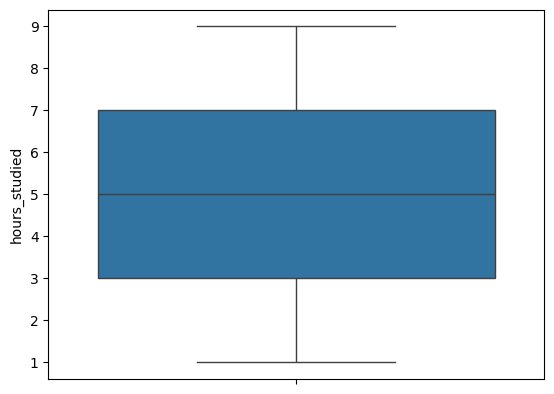

In [ ]:
sns.boxplot(df['hours_studied'])

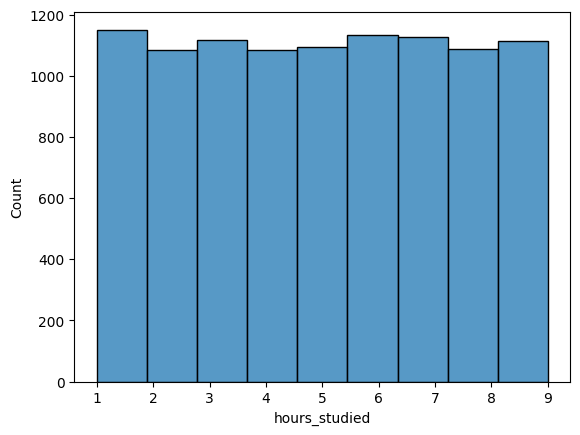

In [ ]:
sns.histplot(df['hours_studied'], bins=9)
plt.show()

<Axes: ylabel='exam1'>

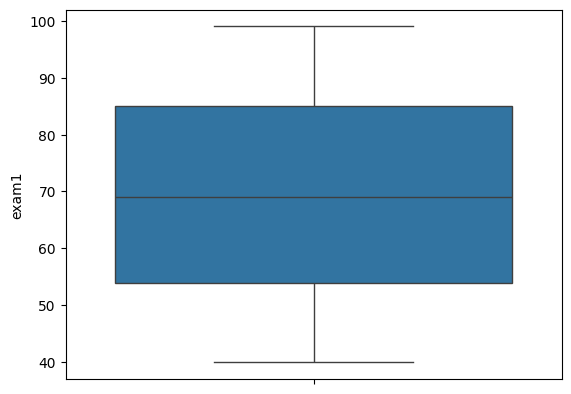

In [ ]:
sns.boxplot(df['exam1'])

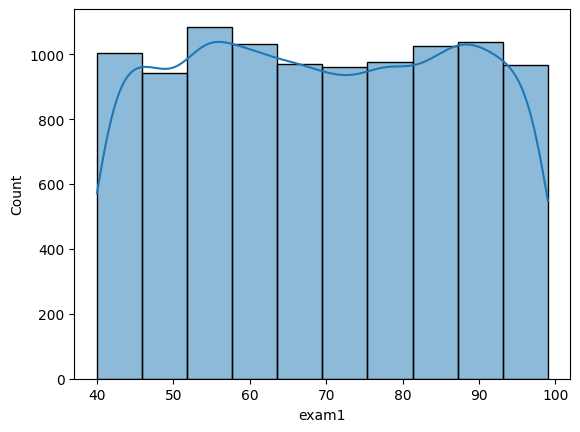

In [ ]:
sns.histplot(df['exam1'], bins=10, kde=True)
plt.show()

<Axes: ylabel='sleep_hours'>

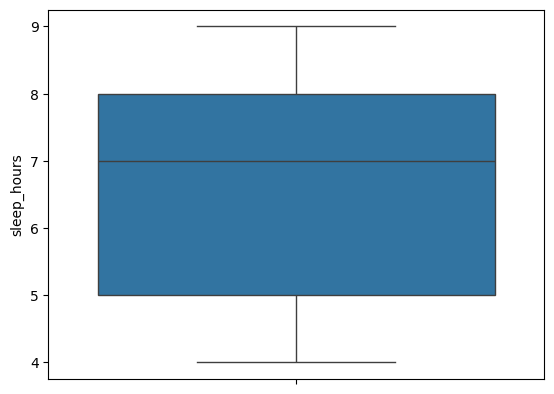

In [ ]:
sns.boxplot(df['sleep_hours'])

<Axes: ylabel='sample_hours'>

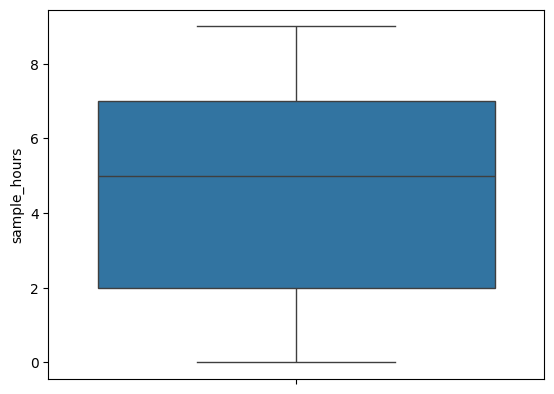

In [ ]:
sns.boxplot(df['sample_hours'])

<Axes: ylabel='exam2'>

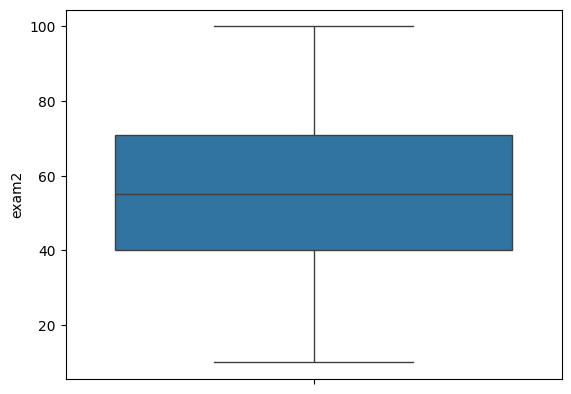

In [ ]:
sns.boxplot(df['exam2'])

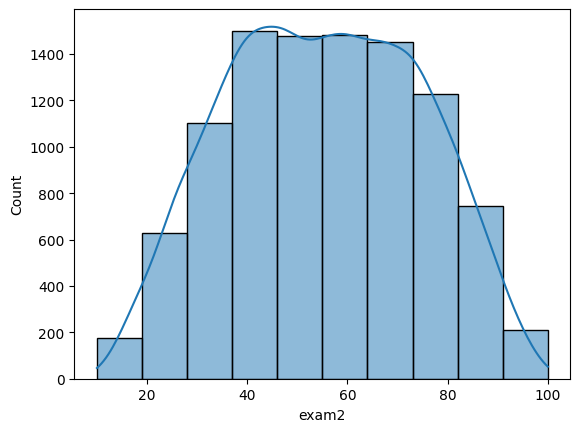

In [ ]:
sns.histplot(df['exam2'], bins=10, kde=True)
plt.show()
# the data distribution focus in the middle, worse performance compared to exam 1

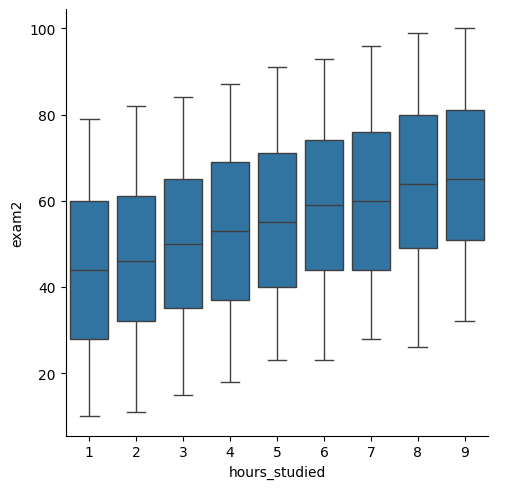

In [ ]:
sns.catplot(x = 'hours_studied', y = 'exam2', data = df, kind = "box")

<Axes: xlabel='exam1', ylabel='exam2'>

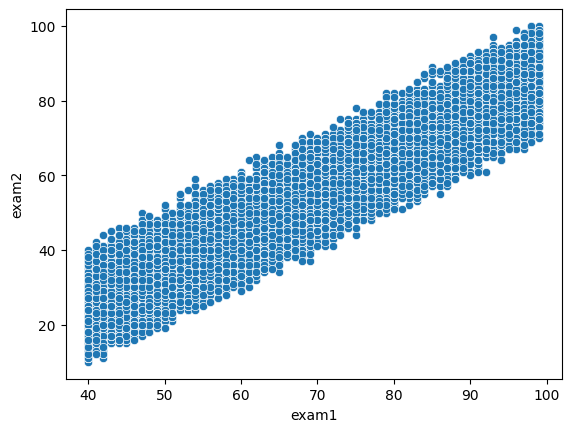

In [ ]:
sns.scatterplot(x = 'exam1', y = 'exam2', data = df)

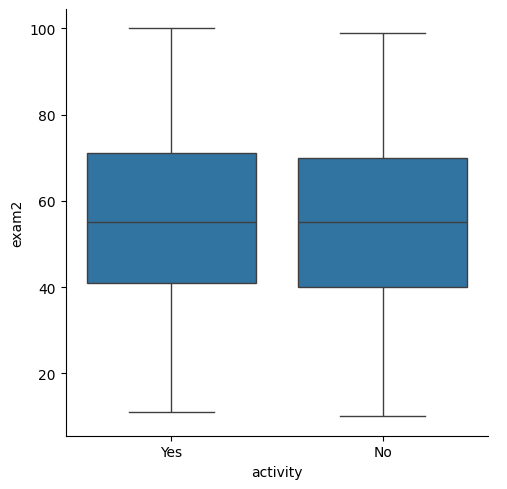

In [ ]:
sns.catplot(x = 'activity', y = 'exam2', data = df, kind = "box")

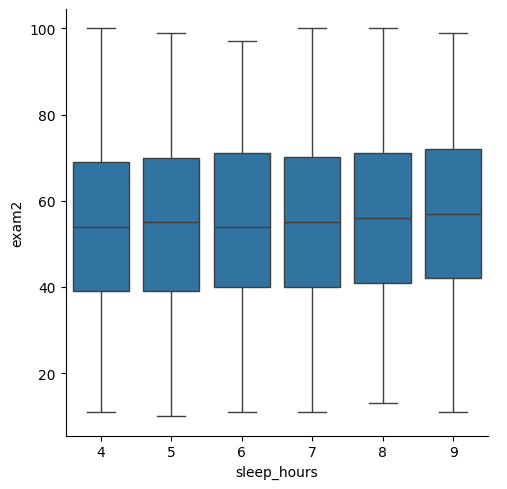

In [ ]:
sns.catplot(x = 'sleep_hours', y = 'exam2', data = df, kind = "box")

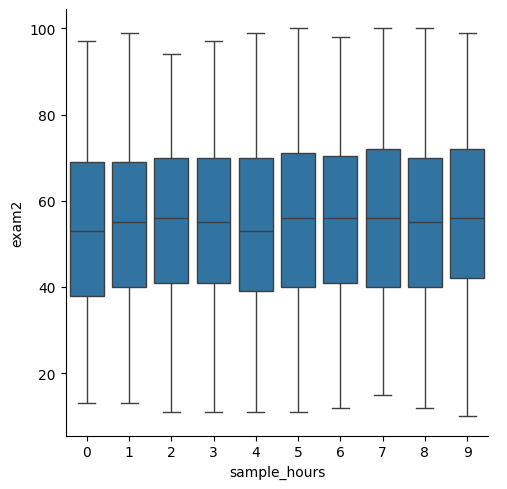

In [ ]:
sns.catplot(x = 'sample_hours', y = 'exam2', data = df, kind = "box")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Machine Learning

In [ ]:
df['activity'] = df['activity'].replace({'No':0, 'Yes':1}).astype(int)

<ipython-input-31-1b69f645dd41>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['activity'] = df['activity'].replace({'No':0, 'Yes':1}).astype(int)


<Axes: >

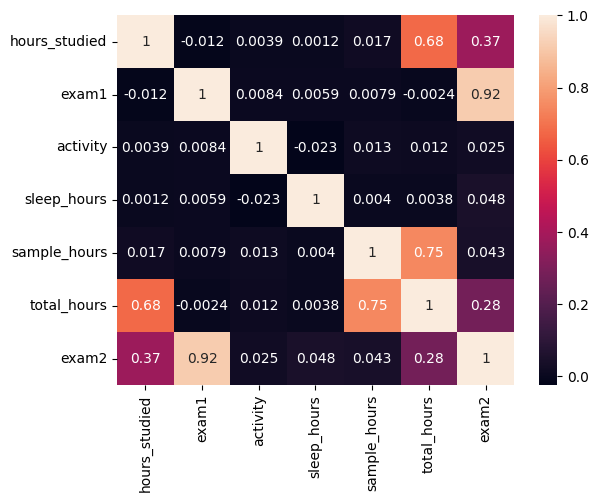

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
Train = df.drop(columns = ["exam2", 'total_hours'])
Target = df["exam2"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.9886898790682355

In [ ]:
predict = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, predict)

1.6111213463123044

In [ ]:
model.coef_

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [ ]:
model.intercept_

np.float64(-33.92194621555638)

In [ ]:
coef = pd.DataFrame(model.coef_, X_train.columns, columns = ['Coefficient'])
coef

,Coefficient
hours_studied,2.852484
exam1,1.016988
activity,0.608617
sleep_hours,0.476941
sample_hours,0.191831


In [ ]:
def exam2_prediction(hours_studied, exam1, activity, sleep_hours, sample_hours):
  return model.predict([[hours_studied, exam1, activity, sleep_hours, sample_hours]])

exam2_prediction(6, 92, 1,7,4)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([81.4704045])

3